<a href="https://colab.research.google.com/github/denghv/Housing_prices_Prediction/blob/master/Project_2_Predicting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nhập thư viện cần dùng**

In [ ]:
# phân tích data
import numpy as np
import pandas as pd

# hiển thị hình ảnh - visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scale theo data standardization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# tạo model bằng Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from keras import optimizers



# đánh giá test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score # loss function
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Thuộc tính có trong dataset**

In [ ]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


--> 5 thuộc tính floats, 15 thuộc tính integers và 1 object

*Phân tích các thuộc tính:*
- id: ID cho mỗi home
- date: ngày bán
- price: giá bán
- bedrooms: số phòng ngủ
- bathrooms: số phòng tắm; .5 là 1 phòng có toilet mà không có bồn tắm
- sqft_living: (square footage) diện tích bên trong căn hộ.
- sqft_lot: diện tích sân
- floors: số tầng
- waterfront: nhà có view hồ view nước không
- view: đánh giá view nhà từ 0 --> 4
- condition: đánh giá tình trạng căn hộ từ 1 --> 5
- grade: chỉ số chất lượng xây dựng và thiết kế thang từ 1 --> 13; 1-3 thấp; 7 trung bình; 11-13 cao
- sqft_above: diện tích không gian bên trong tính trên nền.
- sqft_basement: diện tích không gian trong tính dưới nền nhà.
- yr_built: năm xây dựng
- yr_renovated: năm cải tạo gần nhất
- zipcode:mã vùng
- lat: vĩ độ
- long: Kinh độ
- sqft_living15: diện tích sàn nhà của 15 căn hộ gần nhất
- sqft_lot15: diện tích sân của 15 căn hộ gần nhất

Trong đó, chia ra thành kiểu dữ liệu Categorical và Numerical
- Categorical: kiểu giá trị phân loại các datapoint thành các nhóm giống nhau.
- Numerical: kiểu giá trị khác nhau với mỗi 1 datapoint.
 - Categorical: id, waterfront, zipcode
 - Numerical - liên tục: price, bathrooms, floors, lat, long
 - Numerical - rời rạc:  date, bedrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15.

Kiểm tra có tồn tại giá trị rỗng "null"

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

--> Không có giá trị rỗng

In [ ]:
# count appearances of data values in each column
for column in df.columns:
  print(df[column].value_counts())
  print("-"*25)

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64
-------------------------
date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: count, Length: 372, dtype: int64
-------------------------
price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64
-------------------------
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: 

In [ ]:
# Phân phối các thống kê
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


**Giả thiết dựa trên phân tích dữ liệu**
- Cần biết các features có mối quan hệ như thế nào với Price --> cần ưu tiên .
- Không có giá trị rỗng --> không cần hoàn thiện thêm.
- Thuộc tính Id sẽ được bỏ qua do không có giá trị gia tăng.
- Thuộc tính Date sẽ được bỏ đi thay vào đó chia thành cột năm và cột tháng --> dễ ứng dụng hơn.
- Thuộc tính Zipcode sẽ được bỏ qua do không có kiến thức về khu vực King Country --> bỏ qua để tăng khả năng chính xác.


**Khai phá dữ liệu phân tích**


In [ ]:
# Drop thuộc tính id và zipcode
df = df.drop('id', axis=1)
df = df.drop('zipcode', axis=1)

In [ ]:
# Tách thuộc tính date thành year và month
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date', axis=1)

# check
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


Pearson correlation matrix - ma trận tương quan Pearson

- Sử dụng hệ số tương quan Pearson để kiểm tra độ mạnh và hướng của các mối quan hệ tuyến tính (thuận nghịch) giữa 2 biến liên tục.

- Hệ số tương quan (r) nằm trong khoảng từ -1 đến +1. Nếu hệ số r là 0 thì 2 biến không có quan hệ tương quan tuyến tính, r là 1 hoặc -1 thì 2 biến có quan hệ tương quan tuyến tính tuyệt đối. Nếu r < 0 thì 2 biến sẽ tỉ lệ nghịch, còn nếu r > 0 thì 2 biến tỉ lệ thuận.




<Axes: title={'center': 'Ma trận hệ số tương quan Pearson'}>

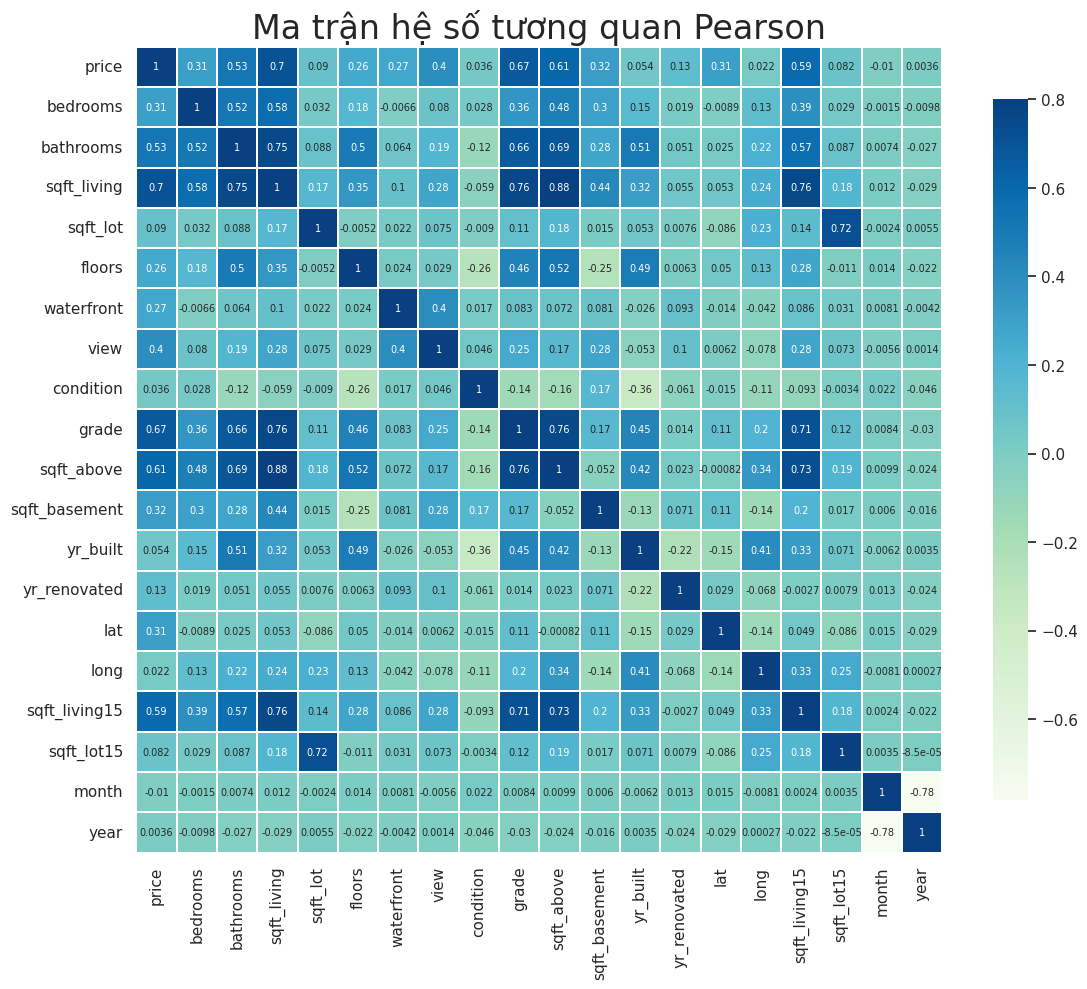

In [ ]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Ma trận hệ số tương quan Pearson',fontsize=24)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.8,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

Tương quan với Price:
- sqft_living có mối tương quan mạnh với price cũng như là grade, sqft_above, sqft_living15 và bathrooms

Xếp hạng tương quan với price

In [ ]:
# Sắp xếp tương quan với price theo descending - giảm dần
price_correlation = df.corr()['price'].sort_values(ascending=False)
print(price_correlation)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
Name: price, dtype: float64


In [ ]:
# Đếm sự xuất hiện của những giá trị trong cột price
print((df['price']).value_counts())


price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64


In [ ]:
# Đếm sự xuất hiện của những giá trị trong cột price với một vài thử nghiệm
print((df['price'] < 1000000).value_counts())

print((df['price'] < 1500000).value_counts())

print((df['price'] < 2000000).value_counts())

print((df['price'] < 3000000).value_counts())


price
True     20121
False     1492
Name: count, dtype: int64
price
True     21080
False      533
Name: count, dtype: int64
price
True     21408
False      205
Name: count, dtype: int64
price
True     21563
False       50
Name: count, dtype: int64


*Phân thích thuộc tính Price*
- Hầu hết giá nhà nằm trong khoảng 0 - 2,000,000 (dollar).
- Giá nhà trung bình 540,000 (dollar).
- Cần tập trung vào giá nhà trong khoảng 0 - 3,000,000 (dollar) --> nên bỏ qua giá trị ngoài khoảng này.
- Nhận thấy mối quan hệ tuyến tính thuận giữa thuộc tính price và thuộc tính sqft_living
 --> Tăng về không gian sống thì tăng về giá nhà.


**Biểu đồ box theo thuộc tính Bedrooms và floors**
- Biểu đồ hộp (boxplot) là một phương pháp để thể hiện trực quan các nhóm dữ liệu theo phân vị (quartile). Biểu đồ hộp có thể có thêm các đường kéo dài từ các hộp cho biết sự thay đổi ngoài các phân vị thứ nhất và thứ ba, do đó có tên là biểu đồ hộp và râu. Các điểm bất thường có thể được vẽ thành các điểm riêng lẻ. Khoảng cách giữa các phần khác nhau của hộp biểu thị mức độ phân tán (dải).


[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price')]

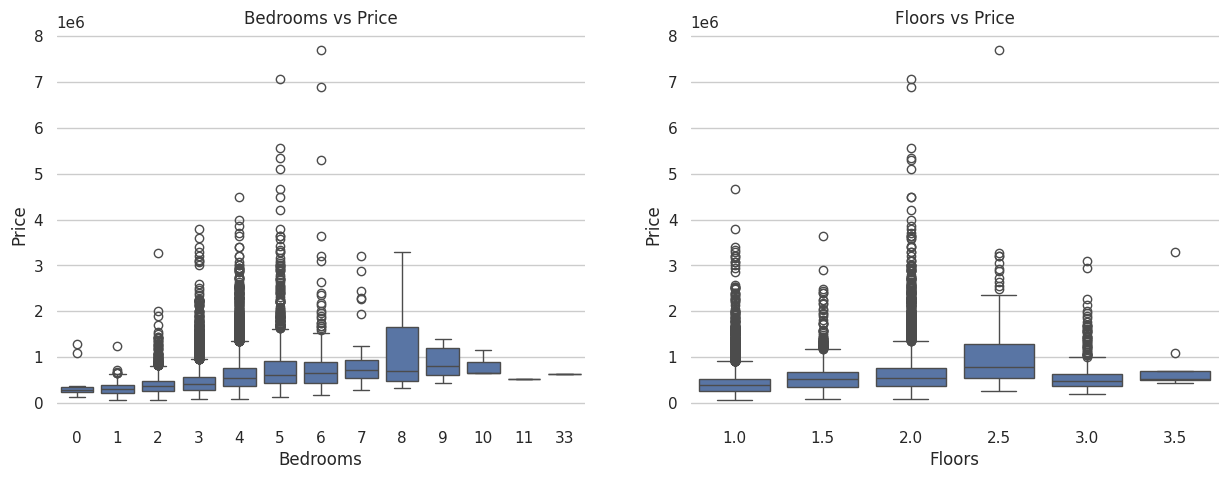

In [ ]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price')

**Biểu đồ box theo thuộc tính waterfront, view và grade**
- Nhà view sông, hồ (waterfront) có xu hướng giá cao hơn.
- Nhà không có waterfront thì giá cả dường như khá tập trung.
- Grade có ít ảnh hưởng đến Price.

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price')]

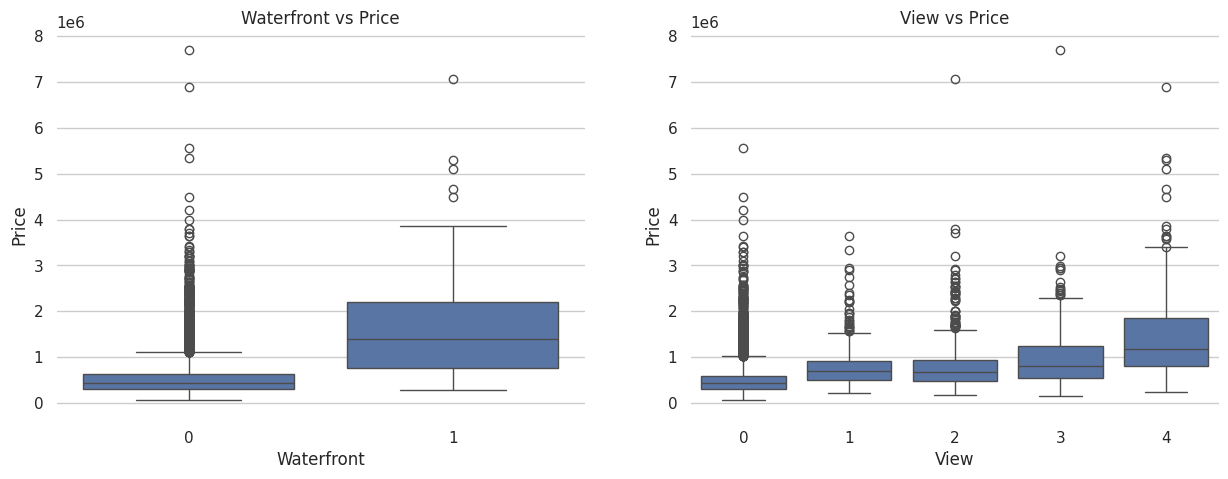

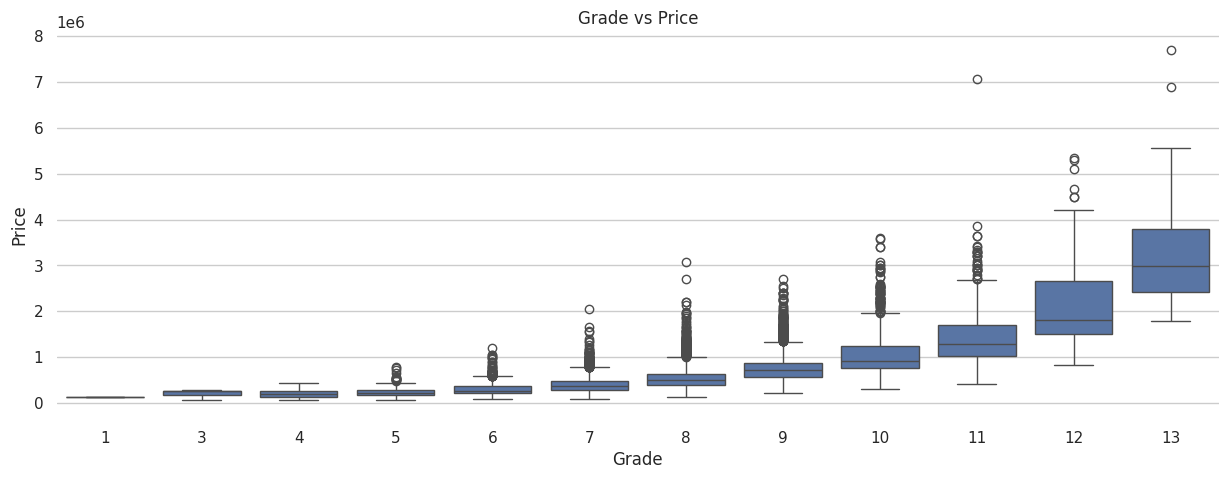

In [ ]:

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price')

**Scaling và train test split**

In [ ]:
# Tập thuộc tính - features
X = df.drop('price',axis=1)

# Output = price
y = df['price']

# Split - Tách train data & test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


**Standardization / scaling the data**

- Thực hiện scale training data, không scale testing data


In [ ]:
#transform data into one uniform scale
scalar= MinMaxScaler()
scalar.fit(X_train)
X_train=scalar.transform(X_train)

# we will use this scale to transform other data also
X_test=scalar.transform(X_test)

In [ ]:
X_test

array([[0.18181818, 0.125     , 0.05735849, ..., 0.010289  , 0.        ,
        1.        ],
       [0.36363636, 0.28125   , 0.13207547, ..., 0.00909894, 0.27272727,
        1.        ],
       [0.36363636, 0.3125    , 0.16679245, ..., 0.00418246, 0.09090909,
        1.        ],
       ...,
       [0.27272727, 0.25      , 0.17584906, ..., 0.00821673, 0.90909091,
        0.        ],
       [0.18181818, 0.125     , 0.04603774, ..., 0.0044122 , 0.27272727,
        1.        ],
       [0.36363636, 0.4375    , 0.24226415, ..., 0.01018447, 0.72727273,
        0.        ]])

In [ ]:
print(X_train.std())
print(X_test.std())

0.284668005128681
0.285138269932232


**Tạo model**
- Trong quá trình huấn luyện mạng nơ-ron, việc ước lượng số lượng nơ-ron là rất quan trọng. Ví dụ nếu kích thước X_train là (15129,19) thì có 15129 mẫu huấn luyện và mỗi mẫu có 19 đặc trưng.
- Optimizer yêu cầu việc thực hiện gradient descent. Trong bài này, sử dụng Adam optimizer và hàm mất mát mean square error (MSE).
 - MSE: với n là số điểm dữ liệu, y(i) là giá trị thực tế, y^(i) là giá trị dự đoán
 - 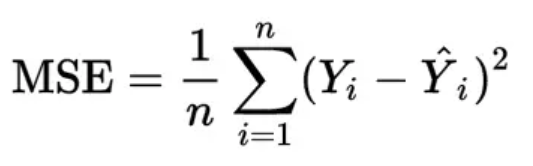

- Adam optimizer (Adaptive Moment Estimation):
 - 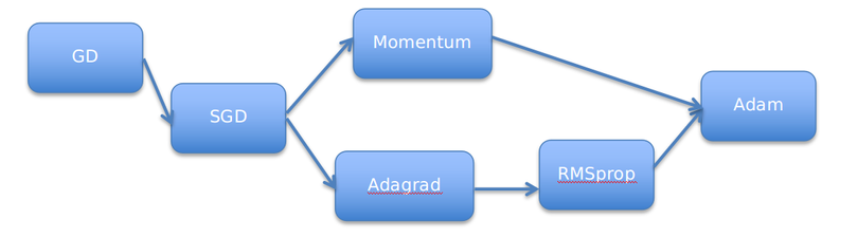




In [ ]:
# # first model
# model = Sequential() # khởi tạo model NN tuần tự

# # input layer
# model.add(Dense(19,activation='relu'))

# # hidden layers
# model.add(Dense(19,activation='relu'))
# model.add(Dense(19,activation='relu'))
# model.add(Dense(19,activation='relu'))

# # output layer
# model.add(Dense(1))

# opt = optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer = opt,
# loss = 'mean_squared_logarithmic_error')

In [ ]:
# second model
#now we will create ANN model
model=Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train, batch_size=128, epochs=500)


Epoch 1/500
119/119 [==============================] - 1s 2ms/step - loss: 423628537856.0000
Epoch 2/500
119/119 [==============================] - 0s 2ms/step - loss: 422703988736.0000
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 408386338816.0000
Epoch 4/500
119/119 [==============================] - 0s 2ms/step - loss: 336889970688.0000
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 191691161600.0000
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 106882850816.0000
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 98539700224.0000
Epoch 8/500
119/119 [==============================] - 0s 3ms/step - loss: 97020403712.0000
Epoch 9/500
119/119 [==============================] - 0s 4ms/step - loss: 95517958144.0000
Epoch 10/500
119/119 [==============================] - 0s 3ms/step - loss: 94029422592.0000
Epoch 11/500
119/119 [==============================] - 0s 3ms/step - los

- Sử dụng mô hình tuần tự cho bài toán (Sequential).
- Dense layer - fully connected layer: lớp của mạng nơ-ron đơn giản, trong đó mỗi nơ-ron nhận đầu vào từ các tế bào nơ-ron của lớp trước.
- Sử dụng hàm kích hoạt 'relu' - ReLU (Rectified Linear Unit)
 - 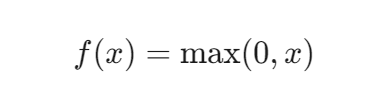
 - Hàm ReLU không bị chặn như Sigmoid hay Tanh nên có thể tránh hiện tượng mất gradient.

**Train model**

- Do dataset độ lớn tương đối nên ta sẽ sử dụng batch_size để chia nhỏ tập dữ liệu.
- Lựa chọn batch_size theo mũ 2 (32, 64, 128, 256...)
 - Batch size càng nhỏ thì thời gian mỗi epoch càng lớn.

In [ ]:
# # sử dụng test data làm validation data (manual verification datasets)
# model.fit(X_train,y_train,
#           validation_data=(X_test,y_test),
#           batch_size=128,epochs=800)

Epoch 1/800
119/119 [==============================] - 6s 15ms/step - loss: 168.4590 - val_loss: 166.7019
Epoch 2/800
119/119 [==============================] - 1s 8ms/step - loss: 164.6074 - val_loss: 162.2093
Epoch 3/800
119/119 [==============================] - 0s 3ms/step - loss: 159.5517 - val_loss: 156.5771
Epoch 4/800
119/119 [==============================] - 0s 4ms/step - loss: 153.3550 - val_loss: 149.8631
Epoch 5/800
119/119 [==============================] - 0s 4ms/step - loss: 146.2940 - val_loss: 142.5350
Epoch 6/800
119/119 [==============================] - 0s 3ms/step - loss: 138.8823 - val_loss: 135.0905
Epoch 7/800
119/119 [==============================] - 0s 4ms/step - loss: 131.4679 - val_loss: 127.7446
Epoch 8/800
119/119 [==============================] - 0s 3ms/step - loss: 124.2212 - val_loss: 120.6251
Epoch 9/800
119/119 [==============================] - 0s 3ms/step - loss: 117.2573 - val_loss: 113.8373
Epoch 10/800
119/119 [==============================] 

*Training loss trên mỗi epoch*

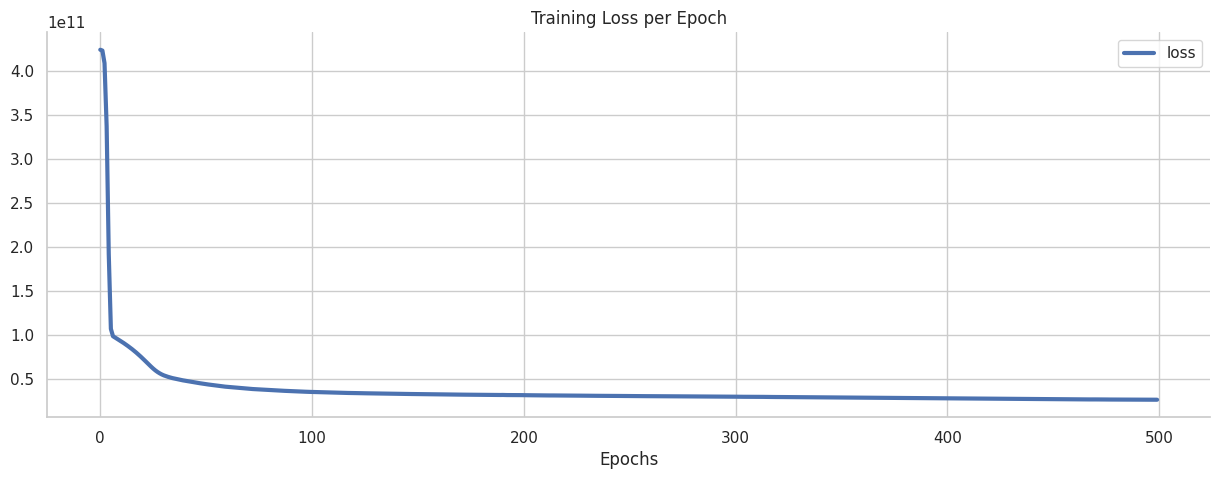

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs') # số lượng vòng lặp
plt.ylabel('')
plt.title('Training Loss per Epoch') # Mất mát trong mỗi vòng lặp
sns.despine()

# Đánh giá trên tập test data
**Các số liệu đánh giá mô hình hồi quy**
- MAE (Mean Absolute Error)
- 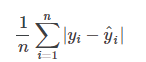

- MSE (Mean Squared Error)
- 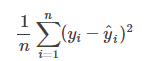

- RMSE (Root Mean Squared Error)
- 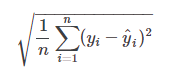

In [ ]:
# dự đoán trên tập test data
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

203/203 [==============================] - 0s 2ms/step
MAE:  102191.73975482919
MSE:  27055551294.19685
RMSE:  164485.71759942215
Variance Regression Score:  0.8071348278212793


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


**Dự đoán giá của căn hộ**

In [ ]:
# Thuộc tính của căn hộ
single_house = df.drop('price',axis=1).iloc[10]
print(f'Features of house:\n{single_house}')

# Thay đổi hình dạng của mảng 1D -> 2D và scale dữ liệu
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# Chạy model và xuất giá nhà dự đoán
print('\nPrediction Price:',model.predict(single_house)[0,0])

# Xuất giá nhà thực tế
print('\nOriginal Price:',df.iloc[10]['price'])



Features of house:
bedrooms            3.0000
bathrooms           2.5000
sqft_living      3560.0000
sqft_lot         9796.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               8.0000
sqft_above       1860.0000
sqft_basement    1700.0000
yr_built         1965.0000
yr_renovated        0.0000
lat                47.6007
long             -122.1450
sqft_living15    2210.0000
sqft_lot15       8925.0000
month               4.0000
year             2015.0000
Name: 10, dtype: float64
1/1 [==============================] - 0s 30ms/step

Prediction Price: 707995.3

Original Price: 662500.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Chạy cho second model**

In [ ]:
#let's predict...
test_predictions = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [ ]:
#let's plot our prediction verses actual
df_pred=pd.DataFrame({'test_actual': y_test})
df_pred['test_pred']=test_predictions
df_pred.head()

,test_actual,test_pred
3834,349950.0,543364.625000
1348,450000.0,621226.875000
20366,635000.0,556465.375000
16617,355500.0,336600.062500
20925,246950.0,212584.171875


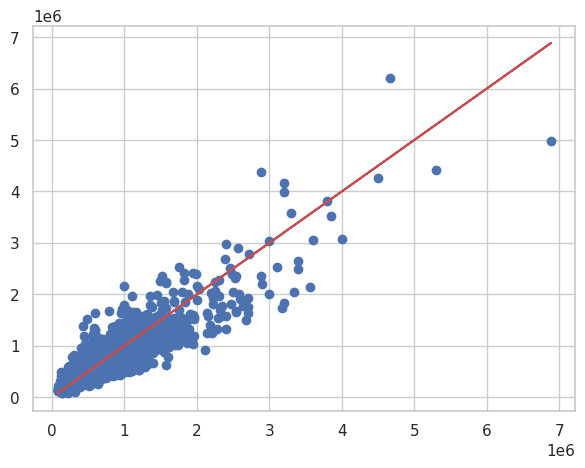

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,test_predictions)
plt.plot(y_test,y_test,'r')


In [ ]:
#calculating model accuracy
(df_pred['test_actual'].sum()-df_pred['test_pred'].sum())/df_pred['test_actual'].sum()


-0.0021930235681254053

**Đánh giá thử nghiệm tham số mô hình**

Bao gồm các quyết định high-level và low-level:
- High-level: số lượng, kích thước, loại layers của mạng neuron sử dụng.
- Low-level: lựa chọn loss function (hàm mất mát), activation functions (hàm kích hoạt), optimizers và số lượng epoch.
- Tập dataset cần từ 10 đến 100 nghìn mẫu thử.

**Đánh giá mô hình với Keras**
- Automatic Verification Datasets
- Manual Verification Datasets
- Manual k-Fold Cross Validation

*Sử dụng Automatic Verification Dataset*
- Keras có thể tách 1 phần của training data thành validation dataset và thực hiện đánh giá hiệu năng của model trên validation dataset ấy trên mỗi epoch.
- Phần trăm validation dataset thường sử dụng là 0.2 và 0.33 cho 20% và 33% của training data.
- Vậy mô hình đạt tối ưu và cận tối ưu thế nào theo Automatic Verification Dataset:
 - khi loss càng gần 0 càng tốt.
 - acc (accuracy) càng gần 100% càng tốt.
 - khi loss và val_loss không giảm và bắt đầu tăng hoặc khi val_acc không cải thiện hoặc giảm thì có thể mô hình đã đạt được tối ưu.

*Sử dụng Manual Verification Dataset*
- Keras cho phép chỉ định tập dữ liệu để đánh giá khi train.
- Chia tập dữ liệu thành train data & test data
- Thay vì lấy trực tiếp tập training data làm validation data thì ta dùng testing data làm validation data.

*Sử dụng k-Fold Cross Validation*
- Đây là 1 tiêu chuẩn vàng khi đánh giá mô hình học máy.
- Chia training data thành các k subsets (tập hợp con)

**Phương pháp đánh giá mô hình dự kiến**
- Sử dụng Cross-validation: do tập dữ liệu vừa và nhỏ
